In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import leastsq
#from muse import *
from SII_profile_fit import *

In [2]:
hdu = fits.open('HE0232-0900.wo_absorption.fits')
qso_data = hdu[0].data
qso_error = hdu[1].data
qso_header = hdu[0].header
wavestart = qso_header['CRVAL3']
wavint = qso_header['CD3_3']
[central_x,central_y]= [67,51]

In [3]:
z = 0.043143
k = 1+z

In [4]:
wave = np.arange(wavestart,(wavestart+(wavint*qso_data.shape[0])),wavint)#start,stop,step
select =(wave>6400*k)&(wave<6800*k)

In [5]:
y = qso_data[:,51,67][select]
x = wave[select]
y_err = qso_error[:,51,67][select]

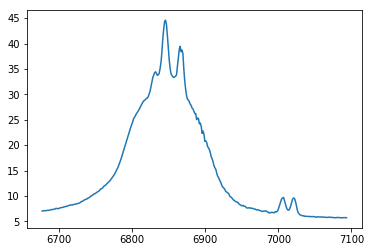

In [6]:
plt.plot(x,y)
plt.show()

In [7]:
#Wing comes from the narrow line region, and the blr comes/is from the black hole;blr stays there. 

In [8]:
#p_init = (30,20,3,3,12942,50,3,3,0.5,0.5,12842,100,18,12942,3000,15,12942,3000,-0.001,0.1)
#popt,pcov = leastsq(complex_gauss,x0=p_init,args=(x,y,y_err),maxfev=10000000)
#print (popt)
#(amp_Ha_core,amp_NII6583_core,amp_SII6716_core,amp_SII6731_core,vel_core,vel_sigma_core,amp_Ha_wing,amp_NII6583_wing,amp_SII6716_wing,amp_SII6731_wing,vel_wing,vel_sigma_wing,amp_Ha_blr1,vel_blr1,vel_sigma_blr1,amp_Ha_blr2,vel_blr2,vel_sigma_blr2,m,c)=popt
#fit = complex_gauss(popt,x,y,y_err)*y_err+y
#residual = y - fit

In [9]:
p_init = (10,15,3,3,12942,50,3,3,0.5,0.5,12742,100,15,12942,1500,7,12942,1000,5,12942,1000,-0.001,0.1)
popt,pcov = leastsq(complex_gauss,x0=p_init,args=(x,y,y_err),maxfev=10000000)
print (popt)
(amp_Ha_core,amp_NII6583_core,amp_SII6716_core,amp_SII6731_core,vel_core,vel_sigma_core,amp_Ha_wing,amp_NII6583_wing,amp_SII6716_wing,amp_SII6731_wing,vel_wing,vel_sigma_wing,amp_Ha_blr1,vel_blr1,vel_sigma_blr1,amp_Ha_blr2,vel_blr2,vel_sigma_blr2,amp_Ha_blr3,vel_blr3,vel_sigma_blr3,m,c)=popt
fit = complex_gauss(popt,x,y,y_err)*y_err+y
residual = y - fit

[  1.11125817e+01   7.10489032e+00   2.89170599e+00   2.98441053e+00
   1.29365521e+04   1.39228073e+02   1.25927454e+01   1.02261276e+01
   3.21458285e-01   5.63703960e-01   1.27292774e+04   4.78397026e+02
   1.10920341e+01   1.26206035e+04   2.79680279e+03   1.09383906e+01
   1.48094323e+04   8.47119860e+02   9.81429920e+00   1.12348144e+04
   7.31839241e+02  -2.37023198e+00   2.25333306e+01]


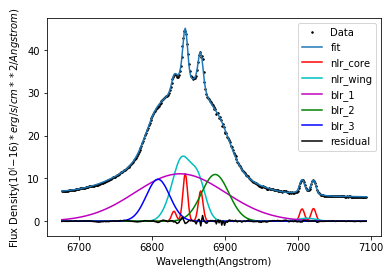

In [10]:
plt.plot(x,y,'ko',markersize=1.5,label='Data')
plt.plot(x,fit,label='fit')
plt.plot(x,nlr_gauss(x,amp_Ha_core,amp_NII6583_core,amp_SII6716_core,amp_SII6731_core,vel_core,vel_sigma_core),'r-',label='nlr_core')
plt.plot(x,nlr_gauss(x,amp_Ha_wing,amp_NII6583_wing,amp_SII6716_wing,amp_SII6731_wing,vel_wing,vel_sigma_wing),'c-',label='nlr_wing')
plt.plot(x,blr_gauss(x,amp_Ha_blr1,vel_blr1,vel_sigma_blr1),'m-',label='blr_1')
plt.plot(x,blr_gauss(x,amp_Ha_blr2,vel_blr2,vel_sigma_blr2),'g-',label='blr_2')
plt.plot(x,blr_gauss(x,amp_Ha_blr3,vel_blr3,vel_sigma_blr3),'b-',label='blr_3')
plt.plot(x,residual,'k-',label = 'residual')
plt.xlabel("Wavelength(Angstrom)")
plt.ylabel("Flux Density($10^(-16)*erg/s/cm**2/Angstrom)$")
plt.legend()
plt.show()

In [11]:
SII_ratio_core=(amp_SII6716_core/amp_SII6731_core) #ratio is of fluxes. check below. we use amp because velocity disperions are 
SII_ratio_wing=(amp_SII6716_wing/amp_SII6731_wing) #coupled, and hence are same and cancel out, leaving only amps behind. 
#flux1 = np.sum(Hb1_blr_br_data)*(np.sqrt(2.*np.pi)*np.fabs(sigma_eff_Hb1))#instead of Hb1_blr, we use SII amp1,amp2. 
#flux2 = np.sum(Hb2_blr_br_data)*(np.sqrt(2.*np.pi)*np.fabs(sigma_eff_Hb2)) 
print (SII_ratio_core,SII_ratio_wing)

0.968937069083 0.57026082466


If the gas density is low (<
∼ 100/cc), the [S II] flux ratio
(6717°A/6731 °A) is about 1.4–1.45. When the density exceeds
∼ 10**(3.5)/cc, the [S II] flux ratio becomes ∼0.44–0.5 (e.g.,
Sanders et al. 2016). By the 2-component fit, we estimate the
brighter component has the density of about 300/cc, similar to
a typical density in NLRs of AGNs. On the other hand, the
outflowing component is very dense, approximately 3000/cc.

In [12]:
vel_offset = vel_core - vel_wing
print (vel_offset)#This is the velocity of the outflow. 

207.2747177


In [13]:
#qso_header #BUNIT is the units of Flux. 

In [ ]:
#Ha is coupled to everything but OIII, and since it's brightest, it has the highest velocity. From the flux ratio, the electron
#density is 3942/cc. This is from Mainak's that runs Py2 --> see email. 

In [12]:
R = 0.57026082466
log_ne = 0.0543*np.tan((-1*(3.0553)*R + 2.8506)) + 6.98 - 10.6905*R + 9.9186*R**2 - 3.5442*R**3

In [13]:
10**(log_ne) #This is more accurate than the Osterbrock. 

3637.2705771967358